In [1]:
import sys
sys.path.append('../')
sys.path.append('../performance_tools/')

In [2]:
from textpair.single.paddle_bow import PaddleBowSim
from textpair.single.ann import Ann
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

import os
import pandas as pd
import numpy as np
from tqdm import tqdm

from dumb_containers import evaluate_performance

In [3]:
VOCAB_FILE = '../data/paddle_models/sim_net/data/term2id.dict'
MODEL_PATH = '../data/paddle_models/sim_net/model_files/simnet_bow_pairwise_pretrained_model/'

LCQMC_PROCESSED_PATH = '/efs/projects/bert_fine_tune/fine_tune/data/train_dev_test/ATEC_CCKS/processed/'
LCQMC_TEST_CSV = os.path.join(LCQMC_PROCESSED_PATH, 'test.csv')
SEP = '\t'

In [4]:
sim = PaddleBowSim(MODEL_PATH, VOCAB_FILE)

In [5]:
test_df = pd.read_csv(LCQMC_TEST_CSV, sep = SEP, na_filter = False)
test_df.head()

,text_1,text_2,label
0,一个身份证号吗两个支付宝账号花呗可以同时使用吗,如何让淘宝可以使用支付宝的花呗,0
1,蚂蚁借呗能能借多少钱,我向花呗借了多少,0
2,你好我每个月还款怎么还,1000元分5期还一个月要还多少钱呢,1
3,花呗支付宝账号怎么切换,花呗咋切换账户,0
4,一万是多少钱一天,一次性还清欠款额度会跟着回复吗,0


In [6]:
probs = []
for row in tqdm(test_df.itertuples(), total=len(test_df)):
    text1 = row.text_1
    text2 = row.text_2
    ann1 = Ann(text1)
    ann2 = Ann(text2)
    res = sim(ann1, ann2)
    score = res['score']
    probs.append(score)

  0%|          | 0/10000 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.661 seconds.
Prefix dict has been built succesfully.
100%|██████████| 10000/10000 [00:15<00:00, 640.87it/s]


../performance_tools/dumb_containers.py:378: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  maxind = plb.find(tpr-fpr == ks)
../performance_tools/dumb_containers.py:382: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  minind = plb.find(abs(cum_total - event_rate) == min(abs(cum_total - event_rate)))


KS=0.166, AUC=0.61, N=10000
At threshold=0.339, TPR=0.44, 1492 out of 3392
At threshold=0.339, TPR=0.29, 1900 out of 6608
Ave_target: [0.225 0.274 0.306 0.311 0.293 0.303 0.317 0.326 0.435 0.602]
Ave_predicted: [0.69029435 0.77112918 0.8062458  0.83062655 0.8525814  0.87115289
 0.8871936  0.90335722 0.92253255 0.9521933 ]


0.1659530757458084

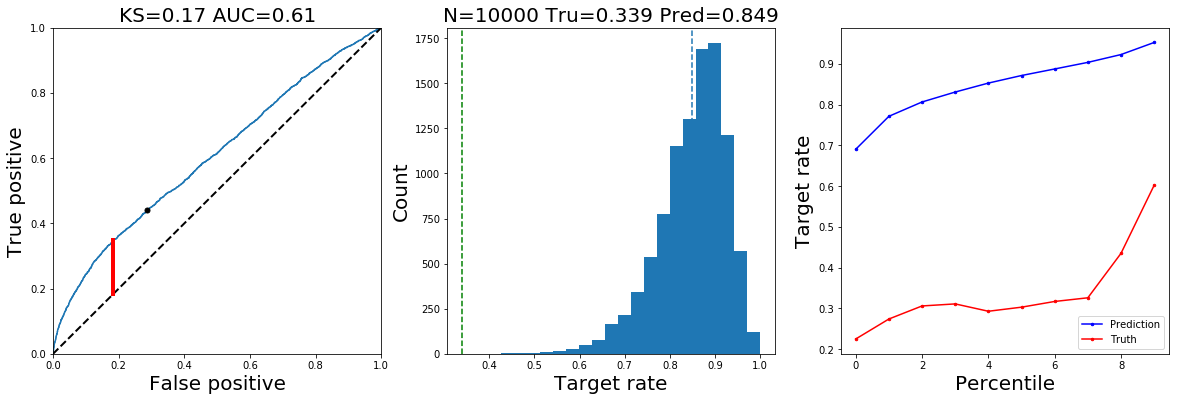

In [7]:
probs = np.array(probs)
gt = test_df.label
evaluate_performance(gt, probs)